In [75]:
import csv
from konlpy.tag import Kkma # 단어 처리
from konlpy.tag import Twitter # 단어 처리
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot
import matplotlib.font_manager # font 관련
%matplotlib inline
import requests
import lxml.html # url 요청에 대한 html 형식 처리
import numpy as np
import re
import operator

In [65]:
def get_word(doc):
    '''길이가 2 이상인 단어만 뽑기(글내용)'''
    tagger = Twitter()
    nouns = tagger.nouns(doc)
    
    remove_noun = []
    with open('remove_word.txt', 'r', newline='\r\n', encoding='utf8') as f:
        for line in f.readlines():
            remove_noun.append(line.strip())
            
    res = []
    for noun in nouns:
        if ((len(noun) > 1) & (noun not in remove_noun)) :
            res.append(noun)
    
    return res

In [66]:
def get_reply_word(doc):
    '''길이가 2 이상인 단어만 뽑기(답변)'''
    tagger = Twitter()
    nouns = tagger.nouns(doc)
    
    remove_noun = []
    with open('remove_reply_word.txt', 'r', newline='\r\n', encoding='utf8') as f:
        for line in f.readlines():
            remove_noun.append(line.strip())
            
    res = []
    for noun in nouns: 
        if ((len(noun) > 1) & (noun not in remove_noun)) :
            res.append(noun)
    
    return res

In [3]:
article_content = []
reply_content = []

with open('content.csv', 'r', newline='\r\n', encoding='utf8') as f:
    reader = csv.reader(f)
    for row in reader:
        text = re.sub("[a-zA-z]|[0-9+]|[(\d{2})[/.-](\d{2})[/.-](\d{4})$]|[*~^.?/(\)/[\]/,-:㈜=&>|;”!@<-]|[★■☞☎③②①☏→※▼▣✔￭ⓒ◇●▶]", "", row[0]).replace('%%㎡%%㎡%%㎡%%','').replace('--',' ').replace('㎡','').replace('/','').replace('%','').replace('〔〕','').replace('〔  〕','').replace('(','').replace(')','').replace('──','')
#         print(re.sub("[a-zA-Z0-9_[]\xa0\r\n\t::~]%", "", row[0].replace('\u3000', ' ').replace('\xa0',' ').replace('\r\n', ' ').replace('\t', '').replace('::', '').replace('~', '').replace('.','').replace('%','').replace('')))
        article_content.append(text)

In [4]:
with open('reply.csv', 'r', newline='\r\n', encoding='utf8') as f2:
    reader_reply = csv.reader(f2)
    for row in reader_reply:
#         print(re.sub("[!~^.?><★♡*;ㅜㅠㅎ]","",row[0]))
#         print(row[0])
        reply_content.append(re.sub("[!~^.?><★♡*;ㅜㅠㅎ]","",row[0]))

In [19]:
def words_count(keyword, news) :    
    '''분석된 단어와 단어의 빈도수 가져오는 함수'''
    ### 형태소 분석기
    tagger = Twitter()
    words=[];count=[];tdf=[]
#     cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)
#     tdf = cv.fit_transform(news)
    
    ### 한단어 빼기 
    if (keyword == "article"):
        cv = CountVectorizer(tokenizer=get_word, max_features=50)
        tdf = cv.fit_transform(news)
        words = cv.get_feature_names()
    else:
        cv = CountVectorizer(tokenizer=get_reply_word, max_features=50)
        tdf = cv.fit_transform(news)
        words = cv.get_feature_names()
    print (words)
    
    count_mat = tdf.sum(axis=0) # 열별로 단어별 출현 빈도 합계 구함(axis = 1 , 각 문서별 명사의 사용 개수)
    count = np.squeeze(np.asarray(count_mat)) # 대괄호가 하나로 줄어듬. 좀더 데이터 핸들링을 쉽게 하기 위해 리스트 형태로 해줌
    print (count)
    
    return words, count, tdf

In [67]:
words , count, tdf = words_count("article", article_content)

['가능성', '가점', '감사', '거주지', '건축물', '결과', '경남', '경쟁률', '계약', '기간', '난방', '납입', '답변', '당첨', '도움', '마감', '마곡지구', '문의', '미만', '발표', '본인', '분양', '서류', '소득', '소유', '신규', '신혼부부', '업데이트', '예정', '월세', '위치', '일반', '일정', '자격', '자녀', '자동차', '자산', '재건축', '저축', '전주', '전환', '조건', '지역', '질문', '청주', '추가', '클릭', '평형', '해당', '현황']
[ 68  47  42  47  39  83  39  76  53  54  40  48 122 154  45  54  36  59
  43  49  48  58  73 198  51  59  77  37  80  43  41 104  74  66  83  54
  66  64  50  43  38  38 121  56  37  44  36  39  42  41]


In [68]:
words_reply, count_reply, tdf_reply = words_count("reply", reply_content)

['가능성', '거주', '거주지', '결과', '경쟁률', '고민', '기간', '기회', '다시', '단독', '단지', '답변', '당첨', '대전', '도움', '모집', '미만', '발표', '버스', '별내역', '보증금', '사람', '상권', '서류', '세대', '세대주', '소득', '소식', '신우', '신청', '신혼부부', '애기', '예비', '예정', '원흥', '위치', '일반', '임대', '임대료', '자녀', '자리', '조건', '주택', '지원', '초보', '추가', '하나', '해당', '호평', '확률']
[ 31  90  20  33  57  30  36  21  21  30  52  24 101  24  24  74  40  19
  20  28  29  42  30  26  22  45  95  61  72 119  39  20  60  20  20  36
  59  65  62  36  20  25  38  27  19  19  19  23  21  24]


In [69]:
matplotlib.rc('font', family='HCR Dotum') # font 지정
word_data = {'word' : words, 'count' : count}
word_df = pd.DataFrame(word_data, columns =['word', 'count'])
word_df

,word,count
0,가능성,68
1,가점,47
2,감사,42
3,거주지,47
4,건축물,39
5,결과,83
6,경남,39
7,경쟁률,76
8,계약,53
9,기간,54


In [70]:
reply_data = {'word' : words_reply, 'count' : count_reply}
reply_word_df = pd.DataFrame(reply_data, columns =['word', 'count'])
reply_word_df

,word,count
0,가능성,31
1,거주,90
2,거주지,20
3,결과,33
4,경쟁률,57
5,고민,30
6,기간,36
7,기회,21
8,다시,21
9,단독,30


In [71]:
group_article_word = word_df.groupby('word').agg({'count': sum})
group_article_word = group_article_word.sort_values(['count'], ascending=[0])
group_reply_word = reply_word_df.groupby('word').agg({'count':sum})
group_reply_word = group_reply_word.sort_values(['count'], ascending=[0])

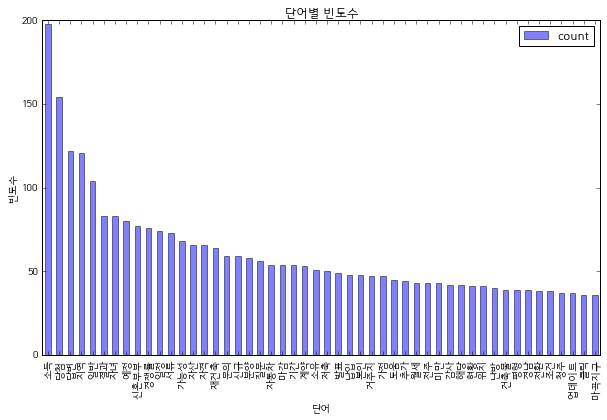

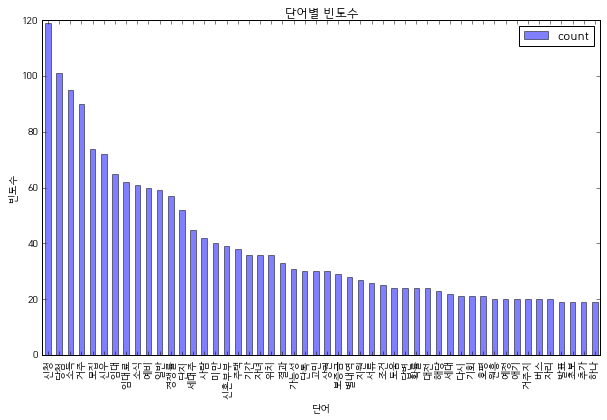

In [72]:
group_article_word.plot(kind="bar", alpha=0.5, rot=90, figsize=(10, 6), color = "blue")
pyplot.xlabel("단어")
pyplot.ylabel("빈도수")
pyplot.title("단어별 빈도수")
# pyplot.savefig(query_string+'_'+remove_slash_end+'_'+'_barplot.png')
pyplot.show()

group_reply_word.plot(kind="bar", alpha=0.5, rot=90, figsize=(10, 6), color = "blue")
pyplot.xlabel("단어")
pyplot.ylabel("빈도수")
pyplot.title("단어별 빈도수")
# pyplot.savefig(query_string+'_'+remove_slash_end+'_'+'_barplot.png')
pyplot.show()

In [73]:
def draw_wordcloud(words, count):
    '''wordcloud 그래프 그리는 함수'''
    word_count = list(zip(words, count)) # zip : 두개의 각 리스트별 원소의 짝을 지어줌
    ## 빈도수 정렬
    sorted(word_count, key=operator.itemgetter(1), reverse=True) # word_count를 1번째(빈도수)를 기준으로 내림차순 정렬을 하라
    ## 워드 클라우드 
    wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
    cloud = wc.generate_from_frequencies(word_count)

    pyplot.figure(figsize=(12, 9))
    pyplot.imshow(cloud)
    pyplot.axis("off")    
#     pyplot.savefig(file_nm+'_'+end+'_wordcloud.png')
    pyplot.show()

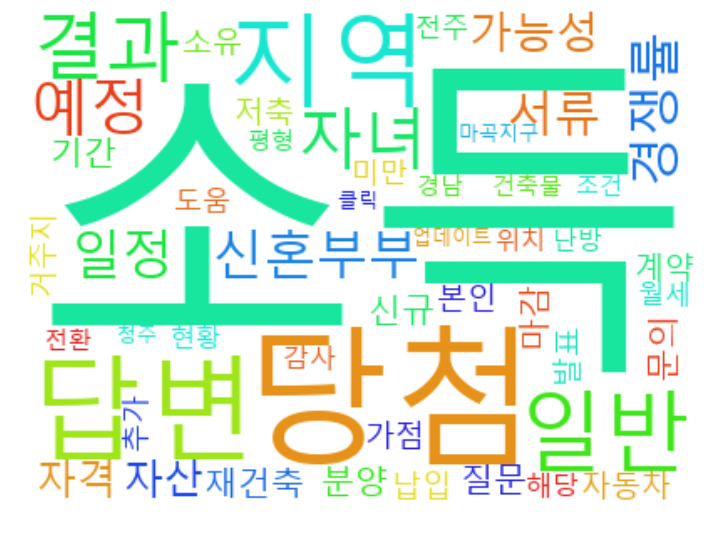

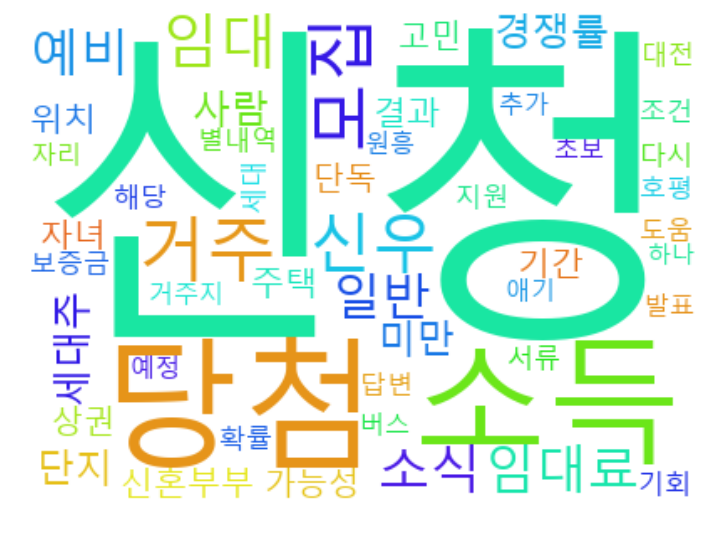

In [76]:
draw_wordcloud(words,count)
draw_wordcloud(words_reply,count_reply)